In [1]:
%matplotlib inline
from IPython.display import Image
%config InlineBackend.figure_format = 'svg'
# export slides with terminal command: 
# jupyter nbconvert run_haats.ipynb --to slides --post serve --reveal-prefix http://cdn.bootcss.com/reveal.js/3.1.0
from import_data import *
from estimation import *
np.random.seed(222)
plt.close("all")
from matplotlib import rc

['/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py', '-f', '/Users/serginio/Library/Jupyter/runtime/kernel-c46ecbb6-707b-4719-a6ae-996467072cc8.json']
['/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py', '-f', '/Users/serginio/Library/Jupyter/runtime/kernel-c46ecbb6-707b-4719-a6ae-996467072cc8.json']
['/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py', '-f', '/Users/serginio/Library/Jupyter/runtime/kernel-c46ecbb6-707b-4719-a6ae-996467072cc8.json']


# On fancy  <font color='grey'>H</font><font color='blue'>A</font><font color='green'>²</font><font color='red'>T</font><font color='purple'>S</font>
![title](/output/figures/queen_hat.jpg) 


### An introduction to <font color='grey'>H</font>idden-state <font color='blue'>A</font>rbitrage-free <font color='green'>A</font>ffine  <font color='red'>T</font>erm <font color='purple'>S</font>tructure (<font color='grey'>H</font><font color='blue'>A</font><font color='green'>A</font><font color='red'>T</font><font color='purple'>S</font>) models




#### Author: Serginio &#8220;Gino&#8221; Sylvain 

#### The US government issues both nominal bonds and inflation-linked bonds (Treasury Inflation Protected Securities; TIPS). 
#### Hence, or a given maturity, the latter tends to be more expensive $\Rightarrow$ lower yields


How do we know when to go long/short Break-Even’s (Nominal Bonds vs ILBs) ?



What is the market-implied inflation rate?



How can we extract the term premium from using a theoretical/structural model?



How can we forecast both nominal and ilb yields in consistent/theoretically robust manner?



How can we extract and forecast market implied discount rates which price these securities?




### We often use the Break-Even rate (BE = Nominal Yield - TIPS Yield) as an estimate of expected inflation

![title](/output/figures/fred_bkeven.jpg) 

For example: if Break-Evens (BE) come down quite a bit, what is that? Should we go long or short Break-evens (by trading ILB’s and short Nominal Bonds or using derivatives)?



But  wait…. BE = Exp. Inf. + IRP

* Perhaps shorting BE’s is more attractive if Exp. Inf. implied by BE’s is “too low”


* If instead, it is the IRP that is low (or negative) and dragging BE’s down, then it may be reflecting that investors  expect  future inflation to coincide with a period of higher income growth and/or that nominal yields are coming down sharply due to safe haven flows 


* In general, Exp. Inf. and IRP implied by BE  can help inform our investment decisions


## Methodology

### <font color='grey'>H</font><font color='blue'>A</font><font color='green'>²</font><font color='red'>T</font><font color='purple'>S</font> ingredients 


#### The model replicates / is heavily inspired by the  series of papers by Christensen – Diebold – Lopez – Rudebusch (2007, 2010, 2013)

Suppose there several nominal bonds (*N*) and several inflation-linked ("real") bonds (*R*)


The no-arbitrage price of a zero-coupon bond with maturity $\tau$ is: 

\begin{eqnarray*}
P_{t}^{N}\{\tau\}&=&E_{t}\left[\frac{M_{t+\tau}^{N}}{M_{t}^{N}}\times1\right]=exp\left(-y_{t}^{N}\left\{ \tau\right\} \cdot\tau\right)\\&&\\P_{t}^{R}\{\tau\}&=&E_{t}\left[\frac{M_{t+\tau}^{R}}{M_{t}^{R}}\times1\right]=exp\left(-y_{t}^{R}\left\{ \tau\right\} \cdot\tau\right)
\end{eqnarray*} 

Here, $y_{t}^{N}$ and $y_{t}^{R}$ are the nominal and real yields respectively. 
$M_{t}^{N}$  and $M_{t}^{N}$ are the nominal and real state price densities.


The SPDs follow 

\begin{eqnarray*}
\frac{dM_{t}^{R}}{M_{t}^{R}}&=&-r_{t}^{R}dt-\Gamma_{t}\cdot dW_{t}\\&&\\\frac{dM_{t}^{N}}{M_{t}^{N}}&=&-r_{t}^{N}dt-\Gamma_{t}\cdot dW_{t}
\end{eqnarray*}

For what follows, to simplify the notation, let us suppress the *N*  and *R*  superscripts. 

The short rates and risk prices are assumed to be affined in the state variables. This is where we put the rabbit inside the hat...

\begin{eqnarray*}
r_{t}&=&\rho_{0}+\rho_{1}\cdot X_{t}
\\
\Gamma_{t}&=&\gamma_{0}+\gamma_{1}\cdot X_{t}
\end{eqnarray*}



\begin{eqnarray*}
P_{t}\{\tau\}&=&E_{t}^{Q}\left[exp\left(-\int_{t}^{t+\tau}r_{s}ds\right)\right]\\&&\\r_{t}&=&\rho_{0}+\rho_{1}\cdot X_{t} \\&&\\\Rightarrow P_{t}\{\tau\}&=&exp\left(B_{t}\left\{ \tau\right\} \cdot X_{t}+G_{t}\left\{ \tau\right\} \right)\\&&\text{Since }exp\left(-\int_{0}^{t}r_{s}ds\right)P_{t}\left\{ \tau\right\} \text{ is Martingale under }Q\text{, it's drift is zero.}\\&&\text{Thus, we allow for no arbitrage and }\\&&\text{ by using Ito's Lemman and setting }E_{t}^{Q}\left[\frac{dP_{t}\{\tau\}}{P_{t}\{\tau\}}\right]-r_{t}=0\\&&B_{t}\left\{ \tau\right\} \text{ and }G_{t}\left\{ \tau\right\} \text{ solve some ODEs.}\\&&\\y_{t}\{\tau\}&=&-\frac{1}{\tau}ln\left(P_{t}\{\tau\}\right)=-\frac{1}{\tau}B_{t}\left\{ \tau\right\} \cdot X_{t}-\frac{1}{\tau}G_{t}\left\{ \tau\right\} 
\end{eqnarray*}

Solving for B_{t}
  and G_{t}
  uniquely typically requires imposing some ad-hoc parameter values and other restrictions with little motivation.
  
  Instead, following Christensen, Lopez, Rudebusch (2010) we assume a dynamic Nelson-Seigel (1987) model and impose level, slope and curvature restrictions by replacing the Nelson-Seigel (1987) parameters with the level, slope and curvature state variables. 
  
  This is sensible since there is a lot of evidence that Level, Slope, and Curvature (e.g. from PCA) explain the cross-section of government bonds. Furthermore, the data we will use to fit the model will itself be smoothe yields data from Nelson-Seigel-Svennson-type models.
  
  
  Hence, the second key assumption concerns the state variables:
  \begin{eqnarray*}
  X_{t}&=&\left(\begin{array}{c}
L_{t}^{N}\\
S_{t}\\
C_{t}\\
L_{t}^{R}
\end{array}\right)
\\
  dX_{t}&=&K^{P}\left(\theta^{P}-X_{t}\right)dt+\Sigma dW_{t}
  \end{eqnarray*}
  
  This implies
  \begin{eqnarray*}
  y_{t}^{N}\{\tau\}	&=&	L_{t}^{N}+S_{t}\left(\frac{1-e^{-\lambda\tau}}{\lambda\tau}\right)+C_{t}\left(\frac{1-e^{-\lambda\tau}}{\lambda\tau}-e^{-\lambda\tau}\right)-\frac{G_{t}^{N}\left\{ \tau\right\} }{\tau}
		\\
y_{t}^{R}\{\tau\}	&=&	L_{t}^{R}+\alpha^{R}S_{t}\left(\frac{1-e^{-\lambda\tau}}{\lambda\tau}\right)+\alpha^{R}C_{t}\left(\frac{1-e^{-\lambda\tau}}{\lambda\tau}-e^{-\lambda\tau}\right)-\frac{G_{t}^{R}\left\{ \tau\right\} }{\tau}
 \end{eqnarray*}
 
 

#### Estimation

We observe the Nominal bond and ILB yields but the state variables (*X*) are hidden. We also need to estimate the model parameters.


First, we can re-write the key equations of the model...


Measurements: $$y_{t}=A_{0}+A_{1}X_{t}+\epsilon_{t} \qquad \text{with }\epsilon_{t}\sim N(0,\Phi)$$


States: $$X_{t}=U_0+U_1 X_{t_-1}+\eta_{t} \qquad \text{with } \eta_{t}\sim N(0,Q)$$


Since the Brownian Motion increments are Gaussian, Kalman-filtering is an efficient and consistent estimator.
It also allows for asynchronous variables (crucial: if we later include observed Macro variables as state variables).


We use the Kalman filter along with MLE to jointly extract the hidden states and estimate the model parameters.



#### Data

Importing and cleaning up (Nelson Siegel smoothed/fitted) yield data for TIPS and Nominal bonds...

Data source:

http://www.federalreserve.gov/econresdata/researchdata/feds200628.xls

https://www.federalreserve.gov/econresdata/researchdata/feds200805.xls

In [2]:
# Import data from FED and doing some cleaning
tips_data, nominal_data = ImportData.importUS_Data(plots=1,save=1)

In [3]:
fig, ax = plt.subplots(1)
figures = {'fig1': fig, 'ax_fig1': ax}
nominal_data.plot(ax=figures['ax_fig1'],figsize=(8,8))
plt.legend(loc='center left',fontsize=9,frameon=0, bbox_to_anchor=(1, 0.5))
figures['ax_fig1'].set_title('US Nominal Bonds')
plt.show()

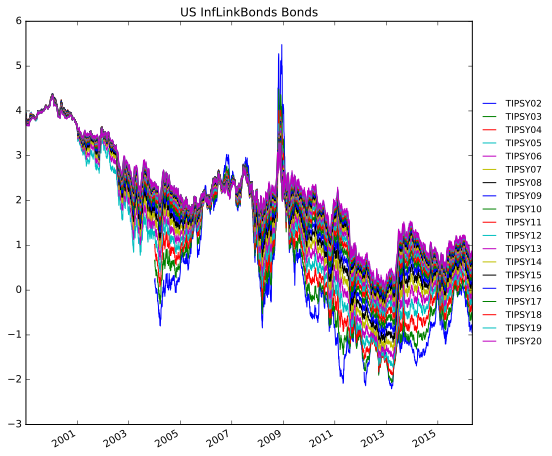

In [4]:
fig, ax = plt.subplots(1)
figures = {'fig2': fig, 'ax_fig2': ax}
tips_data.plot(ax=figures['ax_fig2'],figsize=(8,8))
plt.legend(loc='center left',fontsize=9,frameon=0, bbox_to_anchor=(1, 0.5))
figures['ax_fig2'].set_title('US InfLinkBonds Bonds')
plt.axes.labelcolor='black'
plt.show()

## Running code...

In [12]:
start_time = time.time()

# The interveal between each rolling window: the gap by which the estimationd window shifts 
# (e.g. with tgap = 1, rolling window is updated daily)
tgap = 30 

# Rolling window: 0 if using expanding window, 1 if using rolling window
rolling = 0 

#Rolling window size: size of rolling window (in years).. Use inf for full sample estimation
windowsize = np.inf;

np.set_printoptions(precision=32, suppress=True) #increase precision on  numeric values

# global variables
global a, Kp, lmda,lmda2,  Phi, sigma11, sigma22, sigma22_2, sigma33, sigma33_2,\ 
    sigma44, Sigma, thetap, Nfeval, figures, cum_log_likelihood,\
    Nfeval_vec, cum_log_likelihood_vec, doc, Nfeval_inner

    
################################################

# PRIMITIVES:
figures = []
# use allow_missing_data= 1 to extract ILB and Nominal dates where both are non-missing
allow_missing_data = 0 

# set frequency of the data: daily, monthly, quarterly, yearly
estim_freq = 'daily'  

fix_Phi = 0     # "1" if you want to fix the volatility of observed yields using covar of historical data
                # "0" if you want to jointly estimate it with other model parameters
setdiag_Kp = 0  # "1" if you want to Kp to be diagonal so the state variables are assumed independent
                # "0" if you want to Kp to be unrestricted

# options for initializing the Kalman filter error variance: 
#'steady_state' or 'unconditional' or 'identity' matrix
initV = 'unconditional' 
    
# number of hidden state variables 4, or 6
num_states = 4      

# Specify the maturities of data we want to use
US_ilbmaturities = np.array([2, 3,  5, 6, 8, 9, 10])
US_nominalmaturities = np.array([2, 3,  5, 6, 8, 9, 10])
US_maturities = np.hstack((US_nominalmaturities, US_ilbmaturities))

############################################################

# Set start and end dates for estimation
sdate, edate = '2004-01-01', '2010-01-01'
print("start date: %s" % sdate)
print("end date: %s" % edate)

# extract data for desired maturities and dates
tips_data, nominal_data = ImportData.importUS_Data(US_ilbmaturities, US_nominalmaturities)
data = ImportData.extract_subset(tips_data, nominal_data, sdate, edate, allow_missing_data, estim_freq)

estimation =Rolling()
estimation.run(data, US_ilbmaturities, US_nominalmaturities, \
                estim_freq=estim_freq, num_states=num_states,\
                fix_Phi=fix_Phi, setdiag_Kp=setdiag_Kp, initV=initV )

end_time = time.time()
print("--- %s seconds ---" % (end_time - start_time))

SyntaxError: unexpected character after line continuation character (<ipython-input-12-f58c04d453eb>, line 16)

## Kalman filter example

Measurements: $$y_{t}=A_{0}+A_{1}X_{t}+\epsilon_{t} \qquad \text{with }\epsilon_{t}\sim N(0,\Phi)$$


States: $$X_{t}=U_0+U_1 X_{t_-1}+\eta_{t} \qquad \text{with } \eta_{t}\sim N(0,Q)$$


Assign model parameters

In [5]:
T_=100 #number of dates
m=14 #number of bonds
A0, A1, U0, U1, Q, Phi = np.mat(np.random.randn(m, 1)), np.mat(np.random.randn(m, 4)), \
                            np.mat(np.random.randn(4, 1)), np.mat(np.diag(np.diag(np.random.rand(4, 4)))), \
                            np.mat(np.diag(np.diag(np.random.rand(4, 4)))), np.mat(np.diag(np.diag(np.random.rand(m, m))))

Simulate state variables (X) and the measurement (Y)

In [6]:
X0 = np.mat(np.random.randn(4,1))
X = np.mat(np.empty((T_,4))*np.nan)
Y = np.mat(np.empty((T_,m))*np.nan)
for t in range(T_):
    if t==0:
        X[t,:] = (U0+U1*X0+Q*np.mat(np.random.randn(4,1))).T
    else:   
        X[t,:] = (U0+U1*X[t-1,:].T +Q*np.mat(np.random.randn(4,1))).T
    Y[t,:] = (A0+A1*X[t,:].T+Phi*np.mat(np.random.randn(m,1))).T

X_df= pd.DataFrame(np.array(X),
                columns=['LN', 'S', 'C', 'LR'], index=pd.date_range('2000-01-01', periods=X.shape[0]))
Y_df= pd.DataFrame(np.array(Y),
                columns=['yield_'+str(i) for i in range(14)], index=pd.date_range('2000-01-01', periods=X.shape[0]))

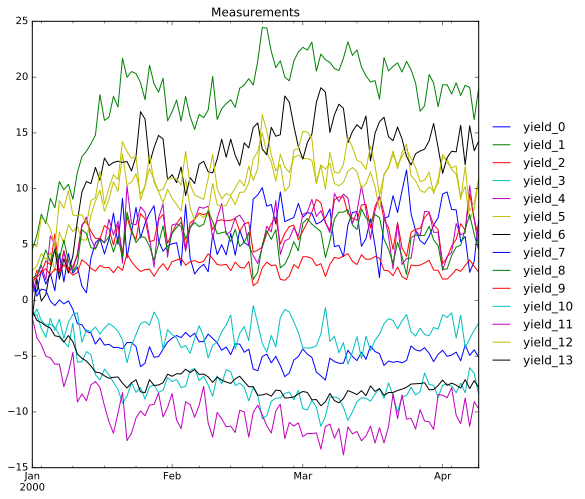

In [7]:
plt.rc('text', usetex=False)
fig, ax = plt.subplots(1)
figures = {'fig2': fig, 'ax_fig2': ax}
Y_df.plot(ax=figures['ax_fig2'],figsize=(8,8),linewidth=1)
plt.legend(loc='center left',fontsize=12,frameon=0, bbox_to_anchor=(1, 0.5))
figures['ax_fig2'].set_title('Measurements')
plt.show()

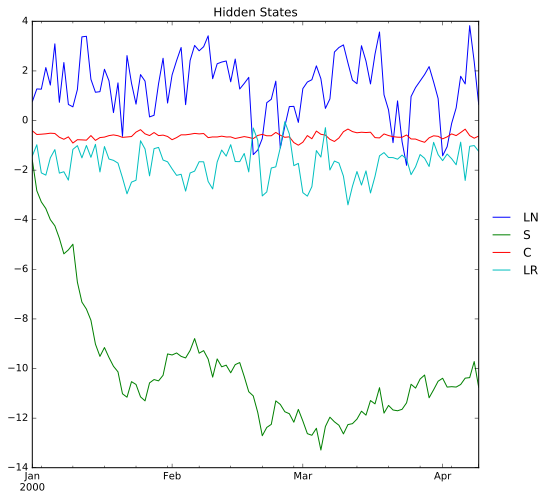

In [8]:
fig, ax = plt.subplots(1)
figures = {'fig2': fig, 'ax_fig2': ax}
X_df.plot(ax=figures['ax_fig2'],figsize=(8,8),linewidth=1)
plt.legend(loc='center left',fontsize=12,frameon=0, bbox_to_anchor=(1, 0.5))
figures['ax_fig2'].set_title('Hidden States')
plt.axes.labelcolor='black'
plt.show()

### Runing filter

In [9]:
kalman = Kalman(Y_df, A0, A1, U0, U1, Q, Phi,statevar_names = X_df.columns.values)
Ytt_filtered, Yttl_filtered, Xtt_filtered, Xttl_filtered, Vtt, Vttl, Gain_t, eta_t_filtered, cum_log_likelihood = kalman.filter()

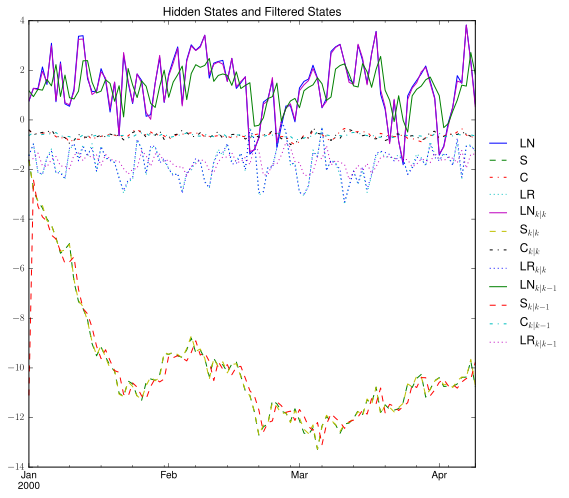

In [10]:
linestyles = ['-', '--', '-.', ':','-', '--', '-.', ':','-', '--', '-.', ':','-', '--', '-.', ':']

plt.rc('text', usetex=True)
fig, ax = plt.subplots(1)
figures = {'fig2': fig, 'ax_fig2': ax}
pd.concat(
    [X_df,
    Xtt_filtered.rename(columns={i:i+'$_{k|k}$' for i in Xtt_filtered.columns.values},inplace=False),
    Xttl_filtered.rename(columns={i:i+'$_{k|k-1}$' for i in Xtt_filtered.columns.values},inplace=False)]
, axis=1).plot(ax=figures['ax_fig2'],figsize=(8,8),style=linestyles,linewidth=1)
plt.legend(loc='center left',fontsize=12,frameon=0, bbox_to_anchor=(1, 0.5))
figures['ax_fig2'].set_title('Hidden States and Filtered States')
plt.axes.labelcolor='black'
plt.show()


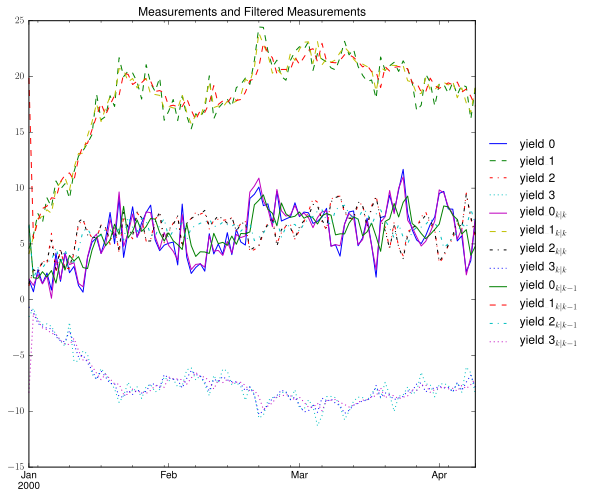

In [11]:
linestyles = ['-', '--', '-.', ':','-', '--', '-.', ':','-', '--', '-.', ':','-', '--', '-.', ':']
plt.rc('text', usetex=True)
fig, ax = plt.subplots(1)
figures = {'fig2': fig, 'ax_fig2': ax}
pd.concat(
    [Y_df.iloc[:,0:4].rename(columns={i:str.replace(i,'_','\_') for i in Y_df.columns.values},inplace=False),
    Ytt_filtered.iloc[:,0:4].rename(columns={i:str.replace(i,'_','\_')+'$_{k|k}$' for i in Ytt_filtered.columns.values},inplace=False),
    Yttl_filtered.iloc[:,0:4].rename(columns={i:str.replace(i,'_','\_')+'$_{k|k-1}$' for i in Yttl_filtered.columns.values},inplace=False)]
, axis=1).plot(ax=figures['ax_fig2'],figsize=(8,8),style=linestyles,linewidth=1)
plt.legend(loc='center left',fontsize=12,frameon=0, bbox_to_anchor=(1, 0.5))
figures['ax_fig2'].set_title('Measurements and Filtered Measurements')
plt.axes.labelcolor='black'
plt.show()

### Forecasts

In [12]:
forecast = kalman.forecast(Xtt_filtered, 10)

In [13]:
forecast.head(20)

yield_0    yield_1   yield_2   yield_3   yield_4  \
date       horizon                                                         
2000-01-01 2000-01-01  1.803235   4.567150  1.238890 -1.532249  0.507765   
           2000-01-02  1.971380   5.497593  1.925605 -1.222958  1.472809   
           2000-01-03  2.190379   6.729525  2.365723 -1.781046  1.976890   
           2000-01-04  2.466054   7.834873  2.752670 -2.305546  2.405467   
           2000-01-05  2.761244   8.837747  3.095909 -2.793872  2.778103   
           2000-01-06  3.055945   9.752813  3.403026 -3.245866  3.107598   
           2000-01-07  3.339802  10.590112  3.679803 -3.662729  3.402480   
           2000-01-08  3.607843  11.357308  3.930606 -4.046357  3.668597   
           2000-01-09  3.858056  12.060733  4.158773 -4.398938  3.910114   
           2000-01-10  4.090042  12.705885  4.366922 -4.722733  4.130129   
           2000-01-11  4.304245  13.297672  4.557166 -5.019956  4.331050   
2000-01-02 2000-01-02  0.713373   5.795179  2.684657 -0.781575  2.145362   
           2000-01-03  1.914977   7.081252  2.851029 -1.888053  2.445403   
           2000-01-04  2.396825   8.254515  3.083376 -2.483352  2.738815   
           2000-01-05  2.794765   9.267560  3.338619 -2.994256  3.029459   
           2000-01-06  3.138675  10.168041  3.593012 -3.447222  3.307226   
           2000-01-07  3.443867  10.980912  3.836243 -3.855738  3.567906   
           2000-01-08  3.718735  11.720543  4.064243 -4.227362  3.810180   
           2000-01-09  3.968313  12.396250  4.275844 -4.566875  4.034131   
           2000-01-10  4.195940  13.014811  4.471200 -4.877703  4.240505   

                        yield_5   yield_6   yield_7   yield_8   yield_9  \
date       horizon                                                        
2000-01-01 2000-01-01  2.654680 -1.561784  1.492247  1.978987  1.773897   
           2000-01-02  3.360300 -0.272905  1.106959  2.400700  2.044401   
           2000-01-03  3.979787  0.811986  0.685498  2.768269  2.214111   
           2000-01-04  4.542948  1.879166  0.256998  3.053365  2.325926   
           2000-01-05  5.060120  2.890783 -0.156362  3.286931  2.405830   
           2000-01-06  5.536569  3.833422 -0.545427  3.485979  2.467312   
           2000-01-07  5.975630  4.704598 -0.907162  3.660202  2.517498   
           2000-01-08  6.379957  5.506534 -1.241372  3.815368  2.560240   
           2000-01-09  6.751960  6.243325 -1.549131  3.955098  2.597688   
           2000-01-10  7.093946  6.919652 -1.832034  4.081802  2.631092   
           2000-01-11  7.408136  7.540219 -2.091844  4.197195  2.661219   
2000-01-02 2000-01-02  3.075028  1.914067  0.377488  2.238984  2.060955   
           2000-01-03  3.963324  1.972356  0.244869  2.877993  2.226726   
           2000-01-04  4.653822  2.689634 -0.054531  3.180443  2.357179   
           2000-01-05  5.226025  3.516988 -0.401753  3.406481  2.439029   
           2000-01-06  5.722104  4.353198 -0.753055  3.591800  2.497354   
           2000-01-07  6.163471  5.155621 -1.090132  3.752524  2.543479   
           2000-01-08  6.561768  5.907937 -1.406040  3.896163  2.582570   
           2000-01-09  6.923935  6.605547 -1.698863  4.026438  2.617043   
           2000-01-10  7.254583  7.248958 -1.968849  4.145400  2.648079   

                       yield_10  yield_11  yield_12  yield_13  
date       horizon                                             
2000-01-01 2000-01-01 -1.351755 -1.525631  5.035146 -0.949165  
           2000-01-02 -1.618650 -3.205616  5.859652 -1.508002  
           2000-01-03 -1.747224 -3.899653  6.450105 -2.050467  
           2000-01-04 -1.851939 -4.500411  6.925016 -2.541857  
           2000-01-05 -1.941559 -5.032042  7.330958 -2.988765  
           2000-01-06 -2.020493 -5.509105  7.690349 -3.396423  
           2000-01-07 -2.091158 -5.940900  8.014498 -3.769037  
           2000-01-08 -2.155012 -6.333780  8.309596 -4.110076  
           2000-01-09 -2.213031 -6.692394  8.579446 -4.42248

In [31]:
#import seaborn as sns
import seaborn.apionly as sns #use sns.distplot but maintain the default matplotlib styling
sns.set("talk", font_scale=1, rc={"lines.linewidth": 1,"axes.labelcolor":'black',"text.color":'black'}) 

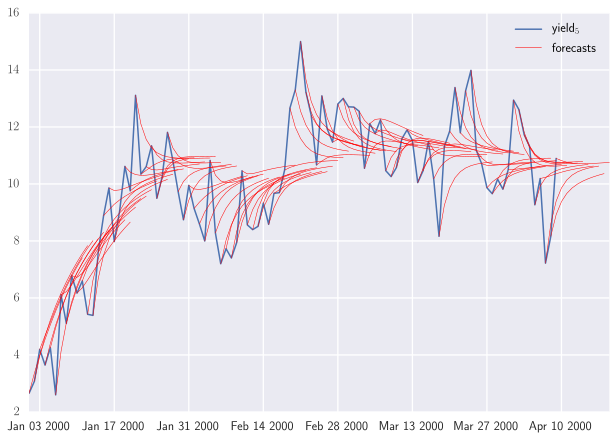

In [24]:
fig, ax = sns.plt.subplots(1)
line,=sns.plt.plot(forecast[['yield_5']].iloc[np.arange(0, forecast.shape[0], 10+1)].set_index(\
    forecast[['yield_5']].iloc[np.arange(0, forecast.shape[0], 10+1)].index.get_level_values('date')),linewidth=1.5\
    #,linestyle='solid', marker='o', markerfacecolor='blue', markersize=3.5
                  )
line.set_label('yield_5')
for t in forecast.index.get_level_values('date').unique():
    line,=sns.plt.plot(
        forecast[['yield_5']].iloc[forecast.index.get_level_values('date')==t,:].set_index(
        forecast[['yield_5']].iloc[forecast.index.get_level_values('date')==t,:].index.get_level_values('horizon'))
        ,color='red',linewidth=0.5)
line.set_label('forecasts')
sns.plt.legend()    
sns.plt.axes.labelcolor='black'
sns.plt.show()

In [152]:
Y = Y_df
def rmse(y_fcst):  #RMSE calculations
    T = Y.shape[0]
    horizon = int(y_fcst.shape[0]/Y.shape[0]-1)
    #Pre-allocate space for squared-error and error dataframes:
    forecast_e ,forecast_se ,forecast_mse ,forecast_rmse ,forecast_mse_all ,forecast_rmse_all= \
        y_fcst*np.nan, y_fcst*np.nan, Y*np.nan, Y*np.nan, Y.iloc[0,:]*np.nan, Y.iloc[0,:]*np.nan,   #Square Error and #Error
    # compute forecast error:    
    forecast_e = pd.DataFrame(
            (Y.reindex(forecast.index.get_level_values('horizon'))-forecast.reset_index('date',drop=True)).reset_index())
    forecast_e['date']=forecast.index.get_level_values('date')
    forecast_e.set_index(['date','horizon'],inplace=True)
    # compute squared forecast error:
    forecast_se = forecast_e ** 2
    # compute rmse for each date t by taking mean over horizons h=0,...,H
    forecast_mse = forecast_se.reset_index().groupby('date').mean()
    forecast_rmse = forecast_mse ** 0.5
    # compute rmse across all dates and horizons
    forecast_mse_all = forecast_se.mean()
    forecast_rmse_all = forecast_mse_all ** 0.5
    return forecast_e, forecast_se, forecast_mse, forecast_rmse, forecast_mse_all, forecast_rmse_all

forecast_e, forecast_se, forecast_mse, forecast_rmse, forecast_mse_all, forecast_rmse_all = \
        rmse(forecast)

In [25]:
forecast_e, forecast_se, forecast_mse, forecast_rmse, forecast_mse_all, forecast_rmse_all = \
        kalman.rmse(forecast)

In [29]:
forecast_rmse.columns

Index([u'yield_0', u'yield_1', u'yield_2', u'yield_3', u'yield_4', u'yield_5',
       u'yield_6', u'yield_7', u'yield_8', u'yield_9', u'yield_10',
       u'yield_11', u'yield_12', u'yield_13'],
      dtype='object')

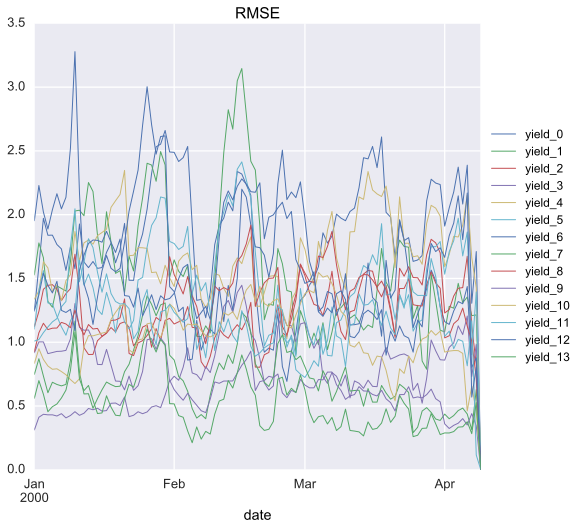

In [30]:
plt.rc('text', usetex=False)
fig, ax = plt.subplots(1)
figures = {'fig2': fig, 'ax_fig2': ax}
forecast_rmse.plot(ax=figures['ax_fig2'],figsize=(8,8),linewidth=1)
plt.legend(loc='center left',fontsize=12,frameon=0, bbox_to_anchor=(1, 0.5))
figures['ax_fig2'].set_title('RMSE')
plt.axes.labelcolor='black'
plt.show()



## Conclusion

### Take away

### Lingering questions

* Why not use a simpler approach (like PCA) to extract the latent state variables?
    * **Answer**: because no arbritrage condition would be violated by such a model and if we would want to use such a model to identify arbitrage, we would be unable to do so because it would not be clear whether we ideed identify arbitrage opportunities of if the model's flaws drive the results. Furthermore, we would not be able to forecast future yields.
    
    

* Why not use VAR?
    * **Answer**: again, no arbritrage condition would be violated


## References

Detailed documentation/appendix can be found at https://github.com/GinoAndTonic/ssylvain_public/blob/master/research/haats/haats_documentation.lyx
https://github.com/GinoAndTonic/ssylvain_public/blob/master/research/haats/haats_documentation.pdf

My Python code and be forked from 

In [28]:
forecast.index.get_level_values('date')

DatetimeIndex(['2000-01-01', '2000-01-01', '2000-01-01', '2000-01-01',
               '2000-01-01', '2000-01-01', '2000-01-01', '2000-01-01',
               '2000-01-01', '2000-01-01',
               ...
               '2000-04-09', '2000-04-09', '2000-04-09', '2000-04-09',
               '2000-04-09', '2000-04-09', '2000-04-09', '2000-04-09',
               '2000-04-09', '2000-04-09'],
              dtype='datetime64[ns]', name=u'date', length=1100, freq=None)

In [23]:
forecast.index.names

FrozenList([u'date', u'horizon'])

In [27]:
forecast['yield_5','date']

KeyError: ('yield_5', 'date')

In [29]:
test =  forecast[['yield_5']].iloc[np.arange(0, forecast.shape[0], 10+1)]

In [32]:
test.index.get_level_values('date')

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04',
               '2000-01-05', '2000-01-06', '2000-01-07', '2000-01-08',
               '2000-01-09', '2000-01-10', '2000-01-11', '2000-01-12',
               '2000-01-13', '2000-01-14', '2000-01-15', '2000-01-16',
               '2000-01-17', '2000-01-18', '2000-01-19', '2000-01-20',
               '2000-01-21', '2000-01-22', '2000-01-23', '2000-01-24',
               '2000-01-25', '2000-01-26', '2000-01-27', '2000-01-28',
               '2000-01-29', '2000-01-30', '2000-01-31', '2000-02-01',
               '2000-02-02', '2000-02-03', '2000-02-04', '2000-02-05',
               '2000-02-06', '2000-02-07', '2000-02-08', '2000-02-09',
               '2000-02-10', '2000-02-11', '2000-02-12', '2000-02-13',
               '2000-02-14', '2000-02-15', '2000-02-16', '2000-02-17',
               '2000-02-18', '2000-02-19', '2000-02-20', '2000-02-21',
               '2000-02-22', '2000-02-23', '2000-02-24', '2000-02-25',
      

In [34]:
test.set_index(test.index.get_level_values('date'))

yield_5
date                 
2000-01-01   2.654680
2000-01-02   3.075028
2000-01-03   4.193630
2000-01-04   3.644425
2000-01-05   4.249041
2000-01-06   2.598973
2000-01-07   6.109925
2000-01-08   5.106201
2000-01-09   6.780139
2000-01-10   6.170189
2000-01-11   6.595894
2000-01-12   5.425264
2000-01-13   5.387331
2000-01-14   7.629056
2000-01-15   8.890210
2000-01-16   9.858851
2000-01-17   7.977456
2000-01-18   9.037563
2000-01-19  10.615463
2000-01-20   9.758295
2000-01-21  13.110471
2000-01-22  10.343965
2000-01-23  10.607459
2000-01-24  11.337855
2000-01-25   9.496463
2000-01-26  10.249701
2000-01-27  11.810608
2000-01-28  10.826575
2000-01-29   9.730478
2000-01-30   8.741997
...               ...
2000-03-11  11.578883
2000-03-12  11.895883
2000-03-13  11.523968
2000-03-14  10.047767
2000-03-15  10.460930
2000-03-16  11.489703
2000-03-17  10.178053
2000-03-18   8.163030
2000-03-19  11.316016
2000-03-20  11.852626
2000-03-21  13.383208
2000-03-22  11.796971
2000-03-23  13.271396
2000-03-24  13.986249
2000-03-25  11.177159
2000-03-26  10.711278
2000-03-27   9.865533
2000-03-28   9.656566
2000-03-29  10.168419
2000-03-30   9.815580
2000-03-31  10.502723
2000-04-01  12.941685
2000-04-02  12.611813
2000-04-03  11.725471
2000-04-04  11.323807
2000-04-05   9.267993
2000-04-06  10.190411
2000-04-07   7.220547
2000-04-08   8.166082
2000-04-09  10.894410

[100 rows x 1 columns]

In [31]:
test = test.reindex(index=test.index.get_level_values('date'))

ValueError: cannot include dtype 'M' in a buffer

In [58]:
forecast[['yield_5']].iloc[forecast.index.get_level_values('date')=='2000-01-01',:].set_index(
    forecast[['yield_5']].iloc[forecast.index.get_level_values('date')=='2000-01-01',:].index.get_level_values('horizon'))

yield_5
horizon             
2000-01-01  2.654680
2000-01-02  3.360300
2000-01-03  3.979787
2000-01-04  4.542948
2000-01-05  5.060120
2000-01-06  5.536569
2000-01-07  5.975630
2000-01-08  6.379957
2000-01-09  6.751960
2000-01-10  7.093946
2000-01-11  7.408136

In [54]:
for t in forecast.index.get_level_values('date').unique():
    print t

2000-01-01 00:00:00
2000-01-02 00:00:00
2000-01-03 00:00:00
2000-01-04 00:00:00
2000-01-05 00:00:00
2000-01-06 00:00:00
2000-01-07 00:00:00
2000-01-08 00:00:00
2000-01-09 00:00:00
2000-01-10 00:00:00
2000-01-11 00:00:00
2000-01-12 00:00:00
2000-01-13 00:00:00
2000-01-14 00:00:00
2000-01-15 00:00:00
2000-01-16 00:00:00
2000-01-17 00:00:00
2000-01-18 00:00:00
2000-01-19 00:00:00
2000-01-20 00:00:00
2000-01-21 00:00:00
2000-01-22 00:00:00
2000-01-23 00:00:00
2000-01-24 00:00:00
2000-01-25 00:00:00
2000-01-26 00:00:00
2000-01-27 00:00:00
2000-01-28 00:00:00
2000-01-29 00:00:00
2000-01-30 00:00:00
2000-01-31 00:00:00
2000-02-01 00:00:00
2000-02-02 00:00:00
2000-02-03 00:00:00
2000-02-04 00:00:00
2000-02-05 00:00:00
2000-02-06 00:00:00
2000-02-07 00:00:00
2000-02-08 00:00:00
2000-02-09 00:00:00
2000-02-10 00:00:00
2000-02-11 00:00:00
2000-02-12 00:00:00
2000-02-13 00:00:00
2000-02-14 00:00:00
2000-02-15 00:00:00
2000-02-16 00:00:00
2000-02-17 00:00:00
2000-02-18 00:00:00
2000-02-19 00:00:00


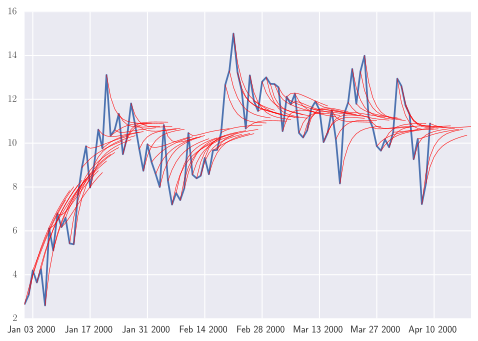

In [60]:
fig, ax = plt.subplots(1)
plt.plot(forecast[['yield_5']].iloc[np.arange(0, forecast.shape[0], 10+1)].set_index(
    forecast[['yield_5']].iloc[np.arange(0, forecast.shape[0], 10+1)].index.get_level_values('date')))
for t in forecast.index.get_level_values('date').unique():
    plt.plot(
        forecast[['yield_5']].iloc[forecast.index.get_level_values('date')==t,:].set_index(
        forecast[['yield_5']].iloc[forecast.index.get_level_values('date')==t,:].index.get_level_values('horizon'))
        ,color='red',linewidth=0.5)
plt.axes.labelcolor='black'

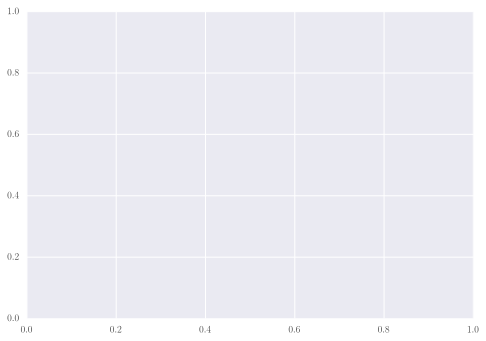

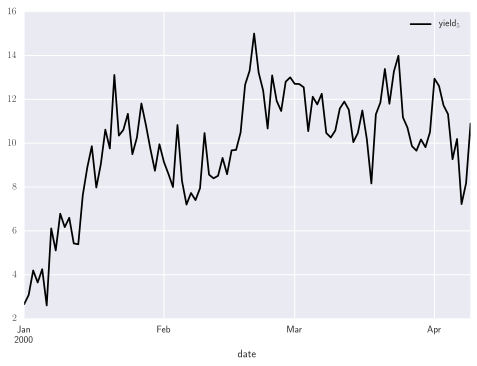

In [39]:
forecast[['yield_5']].iloc[np.arange(0, forecast.shape[0], 10+1)].set_index(
    forecast[['yield_5']].iloc[np.arange(0, forecast.shape[0], 10+1)].index.get_level_values('date')).plot(color='black')

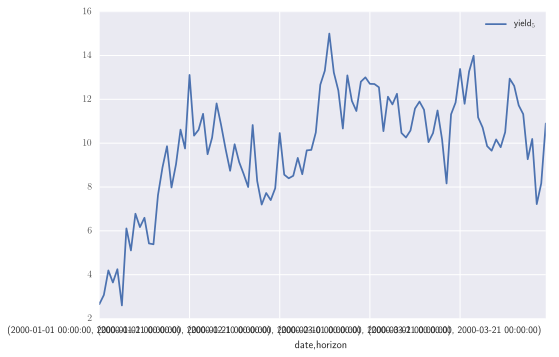

In [20]:
forecast[['yield_5']].iloc[np.arange(0, forecast.shape[0], 10+1)].plot()